# Yes 24 데이터 실습
- 과정
    1. 데이터 수집
    2. EDA, 전처리
    3. 분석 모델링

웹 스크래핑

#yDetailTopWrap > div.topColRgt > div.gd_infoTop > div > h2

In [44]:
import pandas as pd
import missingno as msno

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [45]:
book = pd.read_csv("book.csv", encoding="cp949").drop(columns=["Unnamed: 0"])

book.tail()

,ID,Title,Rating,Author,Price,Pdate,Publisher,Btype,Salseindex
33298,97039591,뇌 1,NaN,베르나르 베르베르,"4,950",2006년 04월 10일,열린책들,old,NaN
33299,97039592,나의 문화유산답사기 6,NaN,유홍준,"6,930",2011년 05월 11일,창비,old,NaN
33300,97039593,말테의 수기,NaN,라이너 마리아 릴케,"3,780",2005년 01월 15일,민음사,old,NaN
33301,97039594,다빈치 코드 1,NaN,댄 브라운,"5,040",2013년 12월 11일,문학수첩,old,NaN
33302,97039595,밥상에 오른 과학,NaN,이성규,"3,990",2007년 05월 20일,봄나무,old,NaN


In [46]:
book.info()
# 타입 변경 Price, Pdata
book["Price"] = book["Price"].str.replace('[^\d.]', '').astype("float64")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33303 entries, 0 to 33302
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          33303 non-null  int64  
 1   Title       25082 non-null  object 
 2   Rating      791 non-null    float64
 3   Author      21434 non-null  object 
 4   Price       22814 non-null  object 
 5   Pdate       24651 non-null  object 
 6   Publisher   24564 non-null  object 
 7   Btype       33303 non-null  object 
 8   Salseindex  812 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.3+ MB


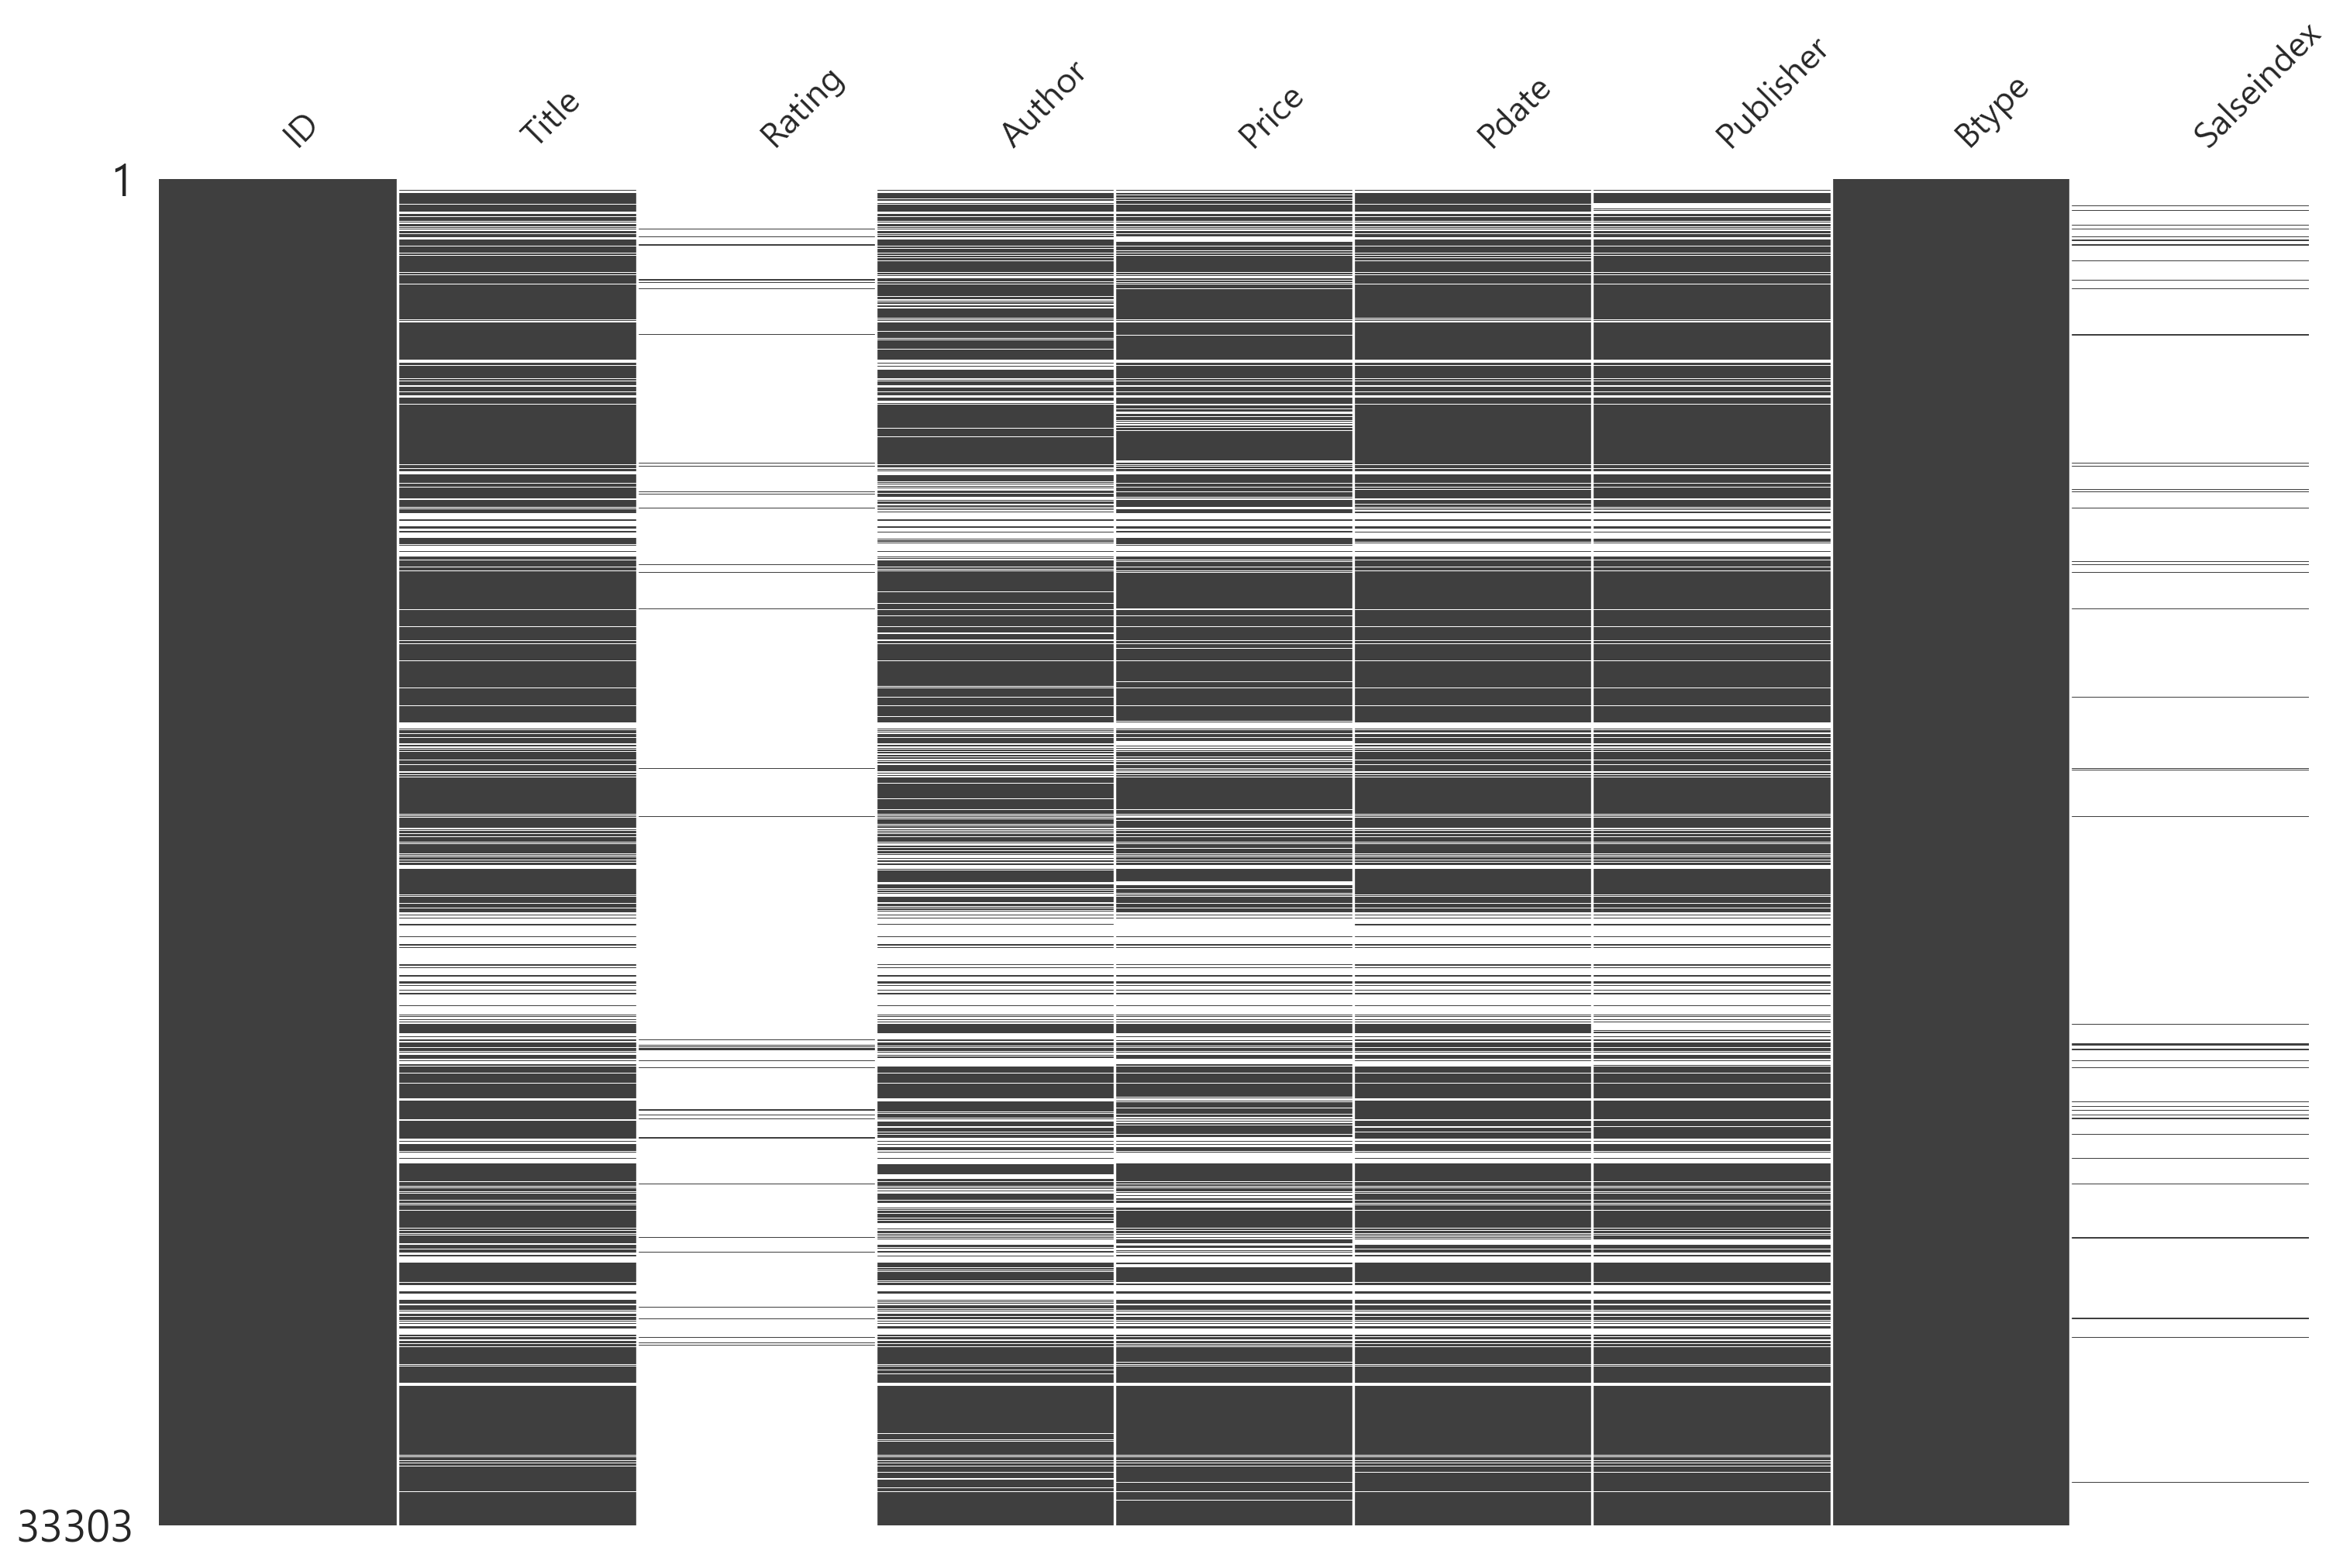

In [47]:
fig, ax = plt.subplots(figsize=(15,10))

msno.matrix(book, ax=ax, sparkline=False);